**Generating visualization graphics with Iris data set**

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

iris_data = datasets.load_iris()

In [ ]:
# Recall sepal length, width and petal length, width 
df_data = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df_data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
21,5.1,3.7,1.5,0.4
59,5.2,2.7,3.9,1.4
146,6.3,2.5,5.0,1.9
2,4.7,3.2,1.3,0.2
110,6.5,3.2,5.1,2.0
143,6.8,3.2,5.9,2.3
32,5.2,4.1,1.5,0.1
49,5.0,3.3,1.4,0.2
98,5.1,2.5,3.0,1.1
126,6.2,2.8,4.8,1.8


In [ ]:
# Answer sheet
df_target = pd.DataFrame(iris_data['target'], columns=['species'])
df_target.sample(5)

,species
47,0
10,0
30,0
51,1
60,1


In [ ]:
# 0 = setosa 1 = versicolor 2 = virginica
df_target['species'].unique()

array([0, 1, 2])

In [ ]:
df = pd.concat([df_data, df_target], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Finding correlation among given info
corr = df_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr(method = 'pearson')
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


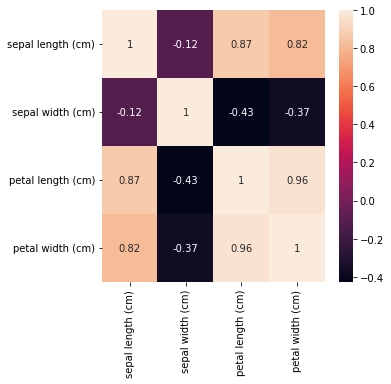

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']].corr(), annot=True)

In [ ]:
# Labeling the species
df['species'].replace({0: "setosa", 1: "vesicolor", 2:'virginica'})

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
df['species'].unique()

array(['setosa', 'vesicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

setosa       50
vesicolor    50
virginica    50
Name: species, dtype: int64

In [ ]:
pie_labels = df['species'].value_counts().index.tolist()
pie_values = df['species'].value_counts().values.tolist()
print(pie_labels)
print(pie_values)

['setosa', 'vesicolor', 'virginica']
[50, 50, 50]


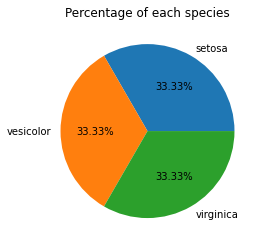

In [ ]:
# Recalling pie chart
plt.pie(pie_values, labels=pie_labels, autopct='%.02f%%')
plt.title('Percentage of each species')
plt.show()

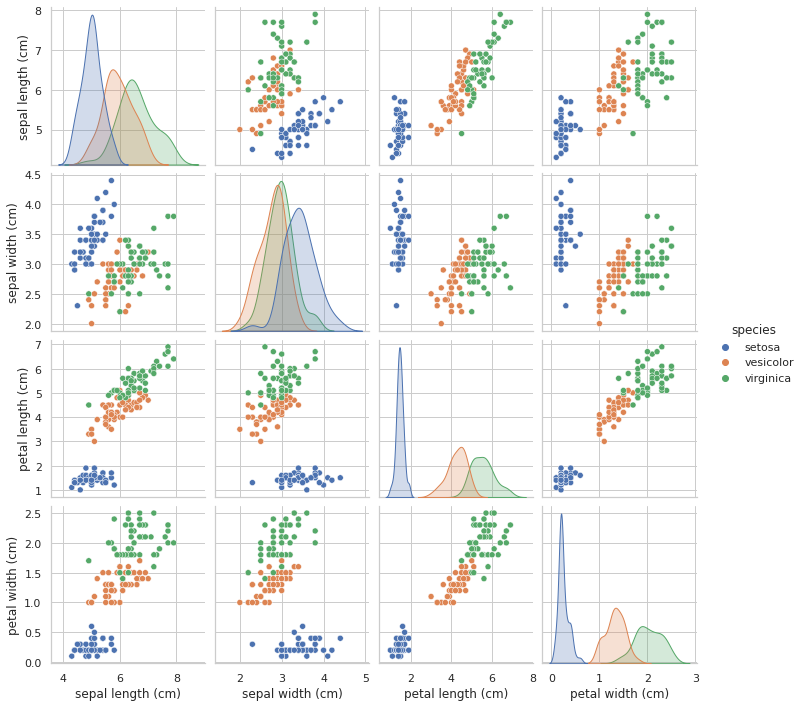

In [ ]:
# Making scatter plot
sns.set(style='whitegrid')
sns.pairplot(df, hue="species")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


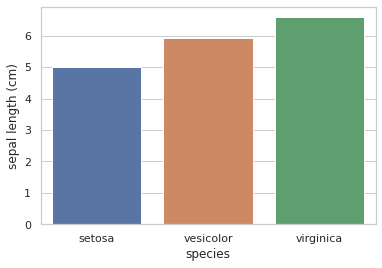

In [ ]:
# Bar chart of species and sepal length
sns.barplot(df['species'], df['sepal length (cm)'], ci=None)

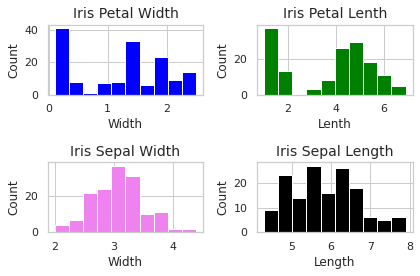

In [ ]:
# Histogram on each feature
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0][0].hist(df['petal width (cm)'], color='blue');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)

ax[0][1].hist(df['petal length (cm)'], color='green');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Lenth', fontsize=12)
ax[0][1].set_title('Iris Petal Lenth', fontsize=14, y=1.01)

ax[1][0].hist(df['sepal width (cm)'], color='violet');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Iris Sepal Width', fontsize=14, y=1.01)

ax[1][1].hist(df['sepal length (cm)'], color='black');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_title('Iris Sepal Length', fontsize=14, y=1.01)

plt.tight_layout()